Dans ce notebook, le but est de comparer les trois métriques en traçons les plots des valeurs des métriques par rapport à une autre

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [262]:
df_PEPR = pd.read_csv("/neurospin/dico/data/human/PEPR_Marseille/PourTheotime.csv", sep="\t")

In [263]:
df_PEPR

,Patient Code,MR negative,Lesion type,Position (Intranat XYZ)
0,0001BAR,y,0: MRI negative,NaN
1,0001BUC,y,0: MRI negative,NaN
2,0001FLO,n,2.1: FCD,70 70 98
3,0001FRE,y,NaN,NaN
4,0001GRE,y,0: MRI negative,NaN
...,...,...,...,...
1436,0277GRE,n,10: Resection,49 123 130
1437,0278GRE,n,2.2: Polymicrogyria,55 157 91
1438,0280GRE,y,0: MRI negative,NaN
1439,0281GRE,y,0: MRI negative,NaN


In [264]:
df_cross_entropy = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Reconstruction_error.csv")

In [265]:
df_cross_entropy

,Unnamed: 0,0
0,0001BAR_27112016,2398.638672
1,0001BUC_17062014,3461.456299
2,0001FLO_02052012,3145.983887
3,0001FRE_16032015,2839.419434
4,0001GRE_25112014,3589.877930
...,...,...
1030,0269GRE_07122021,4711.532715
1031,0270GRE_22012022,4372.996582
1032,0271GRE_19012022,3350.373291
1033,0272GRE_22032022,3720.735596


In [266]:
selected_index = np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/All the subjects/histogram_non_zero/index_to_save.npy")

In [331]:
selected_index_1 = []

In [332]:

for a in df_cross_entropy.iloc[:, 0]:
    if a=="0109GRE_10102016":
        selected_index_1.append(978)
    if a=="0109GRE_12112016":
        selected_index_1.append(979)
    if a=="0164ROT_29012018":
        selected_index_1.append(1158)
    if a=="0168ROT_01032018":
        selected_index_1.append(1172)
    if a=="0168ROT_17092018":
        selected_index_1.append(1173)

    id = a[:7]

    matches = df_PEPR.index[df_PEPR.iloc[:, 0].str[:7] == id]
    if len(matches) == 1:
        selected_index_1.append(matches[0])
    else:
        #print(len(matches))
        j=0
        for i in matches:
            c= len(df_PEPR.iloc[i, 0])
            if c==9:
                id  = a[:7] + a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==11:
                id = a[:7]+ a[10:12]+a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==10:
                id = a[:7]+ a[11]+a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==7:
                selected_index_1.append(747)
                j+=1
selected_index_1= np.array(selected_index_1)

In [335]:
len(selected_index_1)

1035

In [336]:
len(np.unique(selected_index_1))

1035

In [337]:
df_cross_entropy = df_cross_entropy.loc[selected_index].reset_index(drop=True)

In [338]:
df_PEPR= df_PEPR.loc[selected_index_1].reset_index(drop=True) #1 ere sélection
df_PEPR= df_PEPR.loc[selected_index].reset_index(drop=True) #2e sélection


In [339]:
df_PEPR["Lesion type"].isna().sum()

np.int64(7)

In [340]:
df_PEPR

,Patient Code,MR negative,Lesion type,Position (Intranat XYZ)
0,0001BAR,y,0: MRI negative,NaN
1,0001FLO,n,2.1: FCD,70 70 98
2,0001HUH18,y,0: MRI negative,NaN
3,0001KCH,y,NaN,NaN
4,0001LYO,n,1: HS,114 146 125
...,...,...,...,...
820,0265GRE13,y,0: MRI negative,NaN
821,0266GRE,n,6.1: Cerebral cavernous malformation,88 185 44
822,0268GRE,y,0: MRI negative,NaN
823,0272GRE,y,0: MRI negative,NaN


In [341]:
df_cross_entropy

,Unnamed: 0,0
0,0001BAR_27112016,2398.638672
1,0001FLO_02052012,3145.983887
2,0001HUH_30112018,3049.438965
3,0001KCH_08042010,2422.939941
4,0001LYO_19012015,2544.878662
...,...,...
820,0265GRE_08102013,3865.254639
821,0266GRE_29092021,3136.121094
822,0268GRE_30112021,4527.695312
823,0272GRE_22032022,3720.735596


On refait les mêmes opérations effectuées sur df_cross_entropy sur df_chamfer et df_SVM

In [342]:
df_chamfer = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Chamfer_distance.csv")
df_SVM = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Score_Bagging_SVM.csv")

In [343]:
df_chamfer = df_chamfer.loc[selected_index].reset_index(drop=True)
df_SVM = df_SVM.loc[selected_index].reset_index(drop=True)

On prend les valeurs numériques de la colonne "Lésion type"

In [344]:
Lesion_type = (
    df_PEPR["Lesion type"]
    .astype(str)                           # pour gérer les NaN
    .str.extract(r"^\d+(?:\.\d+)?:\s*(.*)")  # texte après le nombre + :
    .iloc[:, 0]                            # Series (et pas DataFrame)
    .where(df_PEPR["Lesion type"].notna()) # remettre NaN là où il faut
    .tolist()
)


In [345]:
Lesion_type= np.array(Lesion_type)

In [346]:
Lesion_type = Lesion_type.flatten()
Lesion_type

array(['MRI negative', 'FCD', 'MRI negative', 'nan', 'HS', 'FCD',
       'Cerebral cavernous malformation', 'FCD', 'FCD', 'MRI negative',
       'MRI negative', 'MRI negative', 'LEAT', 'Resection', 'Resection',
       'MRI negative', 'Resection', 'Resection', 'MCD', 'MRI negative',
       'MRI negative', 'nan', 'MRI negative', 'HS', 'nan', 'MRI negative',
       'MRI negative', 'HS', 'Scar', 'MRI negative', 'MRI negative',
       'FCD', 'MRI negative', 'MRI negative', 'FCD', 'MRI negative',
       'FCD', 'Resection', 'MRI negative', 'MRI negative', 'FCD',
       'MRI negative', 'MRI negative', 'MRI negative', 'FCD', 'HS',
       'MRI negative', 'FCD', 'FCD', 'MRI negative', 'MRI negative',
       'FCD', 'MRI negative', 'Periventricular nodular heterotopia',
       'MRI negative', 'MRI negative', 'FCD', 'MRI negative',
       'MRI negative', 'MRI negative', 'Polymicrogyria', 'MRI negative',
       'Cerebral cavernous malformation', 'Other', 'FCD', 'MRI negative',
       'MRI negative', 

In [347]:
df_cross_entropy

,Unnamed: 0,0
0,0001BAR_27112016,2398.638672
1,0001FLO_02052012,3145.983887
2,0001HUH_30112018,3049.438965
3,0001KCH_08042010,2422.939941
4,0001LYO_19012015,2544.878662
...,...,...
820,0265GRE_08102013,3865.254639
821,0266GRE_29092021,3136.121094
822,0268GRE_30112021,4527.695312
823,0272GRE_22032022,3720.735596


In [348]:
cross_entropy= df_cross_entropy.iloc[:,-1].to_numpy()
cross_entropy

array([2398.63867188, 3145.98388672, 3049.43896484, 2422.93994141,
       2544.87866211, 3868.61230469, 2920.015625  , 3795.09619141,
       3750.45288086, 2838.44433594, 3761.96142578, 3144.48291016,
       3241.1027832 , 4055.73266602, 3566.57202148, 3571.86572266,
       4174.61425781, 3020.609375  , 3596.62792969, 3199.99511719,
       3028.82128906, 3675.05957031, 4562.07714844, 3832.83398438,
       3185.45166016, 3797.49658203, 3242.18798828, 4358.24560547,
       3626.25830078, 2961.11743164, 2333.73193359, 3446.20874023,
       2624.55957031, 4116.11621094, 2862.26513672, 3481.63842773,
       4674.83496094, 3788.71337891, 4053.65576172, 4140.02001953,
       5371.07226562, 4576.734375  , 3671.29321289, 3040.171875  ,
       3299.33447266, 3464.84619141, 3765.8840332 , 2905.21435547,
       3083.82006836, 3490.29345703, 3676.24829102, 3366.15356445,
       3298.0078125 , 4637.28466797, 3055.53027344, 2384.54052734,
       4724.28613281, 2621.39599609, 3483.71435547, 3987.50830

In [349]:
chamfer= df_chamfer.iloc[:,-1].to_numpy()
chamfer

array([0.00142724, 0.00187996, 0.00199203, 0.00138244, 0.00205723,
       0.00244488, 0.00185145, 0.00327603, 0.00244888, 0.0019705 ,
       0.00208276, 0.00294772, 0.00207532, 0.00229224, 0.00391927,
       0.0027804 , 0.00343502, 0.00231953, 0.00208154, 0.00197708,
       0.00311118, 0.00250156, 0.00456942, 0.00383832, 0.00189329,
       0.00231222, 0.00188449, 0.00410821, 0.0022033 , 0.00206933,
       0.00174814, 0.00279595, 0.00204295, 0.00260038, 0.00208255,
       0.00308771, 0.00431845, 0.00300358, 0.00349619, 0.00240892,
       0.00434464, 0.00452127, 0.00343967, 0.00178947, 0.00206139,
       0.00333072, 0.00330309, 0.00252914, 0.00258108, 0.00299877,
       0.00385177, 0.0023693 , 0.00169015, 0.0040216 , 0.0022652 ,
       0.00134536, 0.00626279, 0.00165962, 0.00198981, 0.00295442,
       0.00270762, 0.00277029, 0.00320087, 0.00178061, 0.00214924,
       0.00177621, 0.00242275, 0.00255415, 0.00293228, 0.003374  ,
       0.00192131, 0.00227639, 0.00503687, 0.00141937, 0.00246

In [350]:
SVM= df_SVM.iloc[:,-1].to_numpy()
SVM

array([-6.90299515e+00, -1.20312287e+01, -1.31478405e+01, -1.54743448e+01,
       -1.79575260e+01,  7.66892088e+00, -4.67991342e+00, -3.52263453e+01,
       -9.86187263e+00, -7.50317901e+00, -2.04417948e+00, -4.86693680e+00,
       -1.58363951e+01, -7.29008029e+00,  9.75742488e-01, -1.08319071e+01,
       -2.54453271e+01, -3.44242439e+00, -1.29706851e+01, -4.22551411e+00,
       -8.60552906e+00, -1.24024124e+01, -2.81773438e+01, -8.95476524e+00,
       -1.17941407e+01, -1.58973349e+01, -1.76782630e+01, -2.17549955e+01,
       -1.19341171e+01, -3.05743985e+01, -6.28316009e+00, -3.73534518e+01,
       -2.05254649e+00, -1.90345881e+01, -1.25070706e+01, -1.41006566e+01,
       -3.23743696e+01, -1.59650332e+01,  2.20266015e+00, -1.42702660e+01,
       -1.76585088e+01, -1.85714110e+01, -1.21105981e+01,  1.06904116e-01,
       -1.32585758e+01, -2.94608282e+00, -1.36774831e+01, -1.87037222e+01,
       -4.46149734e+00, -1.25800897e+01, -7.02392836e+00, -2.63334521e+01,
       -7.17460927e+00, -

On trace les graphes

In [351]:
# Valeurs uniques non-NaN de Lesion_type

Lesion_type = pd.Series(Lesion_type)

unique_Lesion_type = Lesion_type.dropna().unique()

# Colormap (autant de couleurs que de valeurs uniques)
cmap = plt.cm.tab10  # ou tab20 si beaucoup de valeurs
colors = cmap(np.linspace(0, 1, len(unique_Lesion_type)))

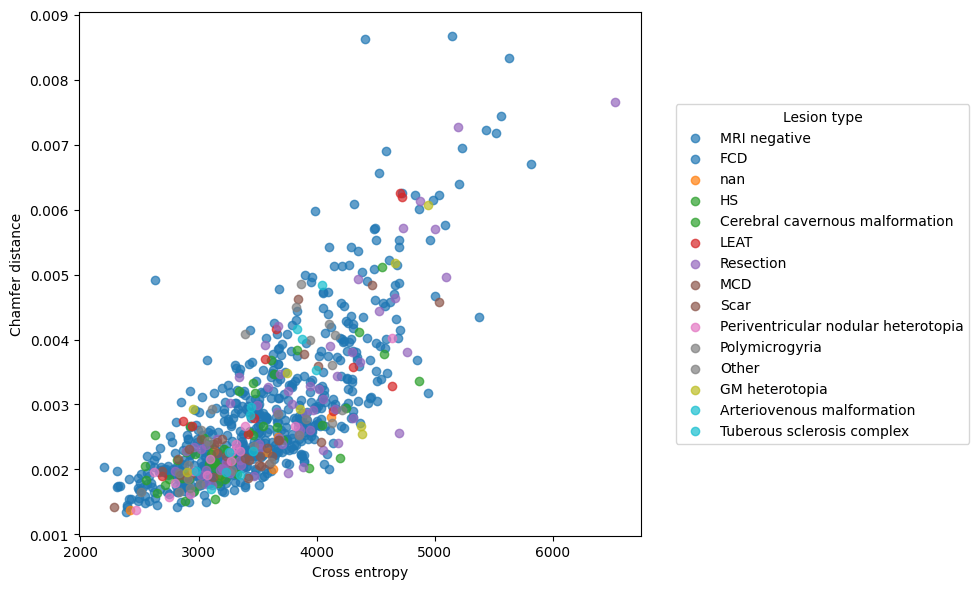

In [352]:
plt.figure(figsize=(10, 6))


# Tracé des points pour chaque valeur de c
for val, col in zip(unique_Lesion_type, colors):
    mask = Lesion_type == val
    plt.scatter(cross_entropy[mask], chamfer[mask], color=col, label=f"{val}", alpha=0.7)

plt.xlabel("Cross entropy")
plt.ylabel("Chamfer distance")
plt.legend(
    title="Lesion type",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left"
)
plt.tight_layout()
plt.show()


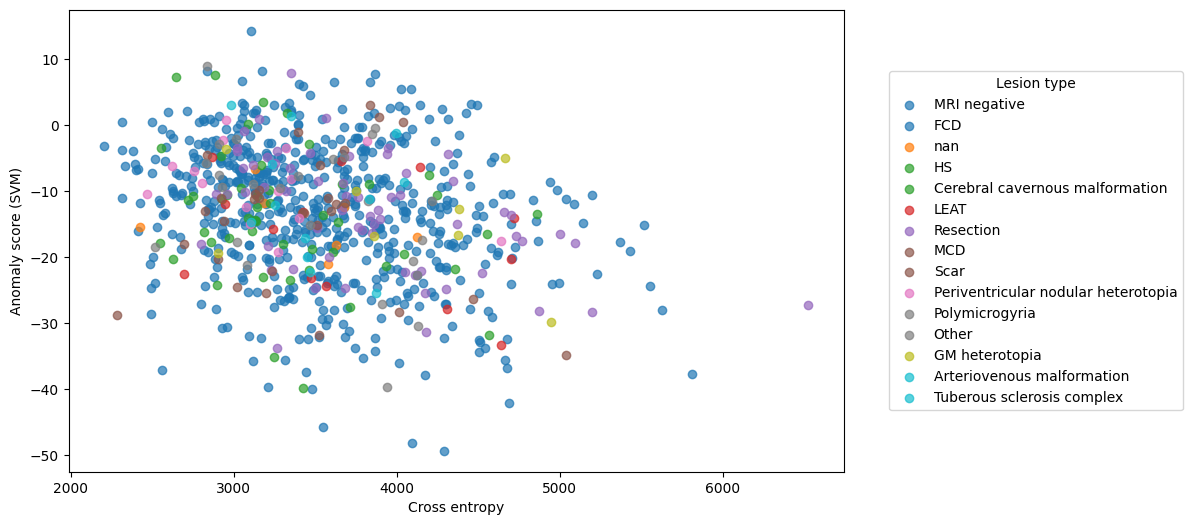

In [353]:
plt.figure(figsize=(10, 6))

# Tracé des points pour chaque valeur de c
for val, col in zip(unique_Lesion_type, colors):
    mask = Lesion_type == val
    plt.scatter(cross_entropy[mask], SVM[mask], color=col, label=f"{val}", alpha=0.7)


plt.xlabel("Cross entropy")
plt.ylabel("Anomaly score (SVM)")
plt.legend(
    title="Lesion type",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left"
)
plt.show()


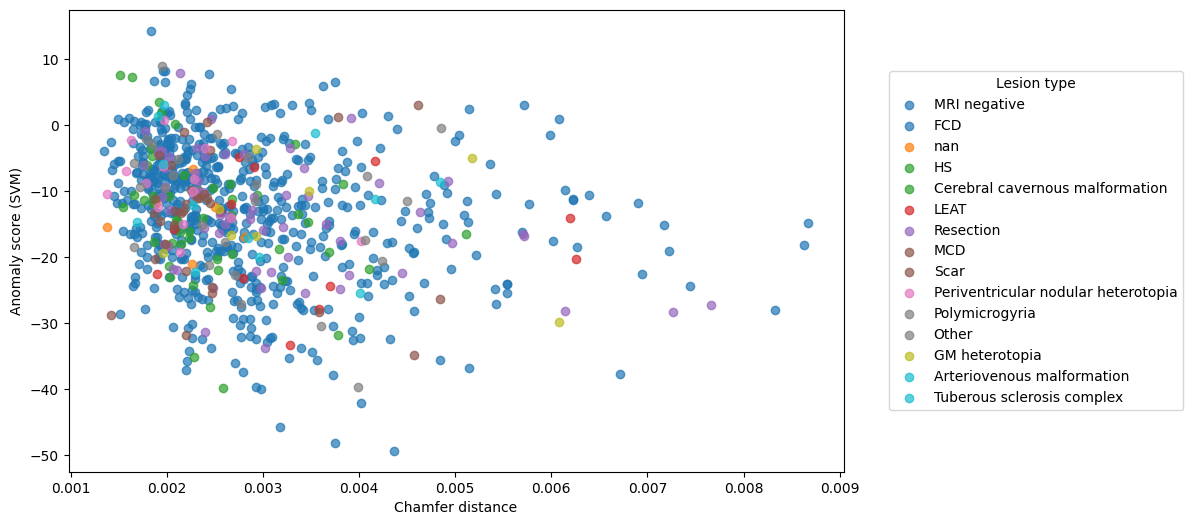

In [354]:
plt.figure(figsize=(10, 6))


# Tracé des points pour chaque valeur de c
for val, col in zip(unique_Lesion_type, colors):
    mask = Lesion_type == val
    plt.scatter(chamfer[mask], SVM[mask], color=col, label=f"{val}", alpha=0.7)

plt.xlabel("Chamfer distance")
plt.ylabel("Anomaly score (SVM)")
plt.legend(
    title="Lesion type",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left"
)
plt.show()
